# Tensorflow practice C2W4

+ add another dimension to image

In [1]:
import csv
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from google.colab import files

/Users/jinwooahn/miniforge3/envs/tf_certificate/lib/python3.8/site-packages/google/colab/data_table.py:30: UserWarning: IPython.utils.traitlets has moved to a top-level traitlets package.
  from IPython.utils import traitlets as _traitlets


In [3]:
#callback 오류 뜰 경우 pip install --upgrade requests 하면 된다.
# sign_mnist_train.csv
!gdown --id 1z0DkA9BytlLxO1C0BAWzknLyQmZAp0HR
# sign_mnist_test.csv
!gdown --id 1z1BIj4qmri59GWBG4ivMNFtpZ4AXIbzg

Downloading...
From: https://drive.google.com/uc?id=1z0DkA9BytlLxO1C0BAWzknLyQmZAp0HR
To: /Users/jinwooahn/Documents/dev_folder/2021_2nd_semester/tensorflow_certificate/C2/W4/sign_mnist_train.csv
100%|██████████████████████████████████████| 83.3M/83.3M [00:03<00:00, 24.2MB/s]
Downloading...
From: https://drive.google.com/uc?id=1z1BIj4qmri59GWBG4ivMNFtpZ4AXIbzg
To: /Users/jinwooahn/Documents/dev_folder/2021_2nd_semester/tensorflow_certificate/C2/W4/sign_mnist_test.csv
100%|██████████████████████████████████████| 21.8M/21.8M [00:01<00:00, 16.3MB/s]


In [4]:
def get_data(filename):
    with open(filename) as training_file:
        csv_reader = csv.reader(training_file, delimiter=',')
        first_line = True
        temp_images = []
        temp_labels = []
        for row in csv_reader:
            if first_line:
                #ignoring first line
                first_line = False
            else:
                #row에서 라벨과 이미지 데이터를 분리
                temp_labels.append(row[0])
                image_data = row[1:785]
                image_data_as_array = np.array_split(image_data, 28)
                temp_images.append(image_data_as_array)
                
        images = np.array(temp_images).astype('float')
        labels = np.array(temp_labels).astype('float')
    
    return images, labels

In [5]:
training_images, training_labels = get_data('./sign_mnist_train.csv')
testing_images, testing_labels = get_data('./sign_mnist_test.csv')

print(training_images.shape)
print(training_labels.shape)
print(testing_images.shape)
print(testing_labels.shape)

(27455, 28, 28)
(27455,)
(7172, 28, 28)
(7172,)


In [7]:
# for using np.expand_dims, add another dimension to the data
# ex. (10000, 28, 28) to (10000, 28, 28, 1)

training_images = np.expand_dims(training_images, axis = 3)
testing_images = np.expand_dims(testing_images, axis = 3)

train_datagen = ImageDataGenerator(
                rescale = 1. / 255.,
                rotation_range=40,
                width_shift_range=0.2,
                height_shift_range=0.2,
                shear_range=0.2,
                zoom_range=0.2,
                horizontal_flip=True,
                fill_mode='nearest')

validation_datagen = ImageDataGenerator(
rescale=1. / 255.)

print(training_images.shape)
print(testing_images.shape)

(27455, 28, 28, 1)
(7172, 28, 28, 1)


In [29]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu', input_shape=(28,28,1)),
    tf.keras.layers.MaxPool2D(2,2),
    tf.keras.layers.Conv2D(64,(3,3), activation='relu'),
    tf.keras.layers.MaxPool2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(26, activation='softmax')
])

model.compile(optimizer = 'adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

history = model.fit(train_datagen.flow(training_images, training_labels, batch_size=32),
                                      steps_per_epoch = len(training_images) / 32,
                                       epochs=15,
                                       validation_data=validation_datagen.flow(testing_images, testing_labels, batch_size=32),
                              validation_steps=len(testing_images) / 32)

model.evaluate(testing_images, testing_labels, batch_size= 32)

Epoch 1/15
  3/857 [..............................] - ETA: 29s - loss: 3.2660 - accuracy: 0.0417     

2021-11-17 11:19:00.120425: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


858/857 [==============================] - ETA: 0s - loss: 2.7796 - accuracy: 0.1589

2021-11-17 11:19:08.189065: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


857/857 [==============================] - 9s 11ms/step - loss: 2.7796 - accuracy: 0.1589 - val_loss: 1.7985 - val_accuracy: 0.4182
Epoch 2/15
857/857 [==============================] - 9s 10ms/step - loss: 2.0760 - accuracy: 0.3466 - val_loss: 1.5375 - val_accuracy: 0.4679
Epoch 3/15
857/857 [==============================] - 9s 10ms/step - loss: 1.7159 - accuracy: 0.4560 - val_loss: 1.1496 - val_accuracy: 0.6118
Epoch 4/15
857/857 [==============================] - 9s 10ms/step - loss: 1.5024 - accuracy: 0.5154 - val_loss: 0.9189 - val_accuracy: 0.7027
Epoch 5/15
857/857 [==============================] - 9s 10ms/step - loss: 1.3621 - accuracy: 0.5536 - val_loss: 0.7351 - val_accuracy: 0.7543
Epoch 6/15
857/857 [==============================] - 9s 10ms/step - loss: 1.2523 - accuracy: 0.5897 - val_loss: 0.7209 - val_accuracy: 0.7595
Epoch 7/15
857/857 [==============================] - 9s 10ms/step - loss: 1.1554 - accuracy: 0.6197 - val_loss: 0.6818 - val_accuracy: 0.7882
Epoch 8/15

2021-11-17 11:21:13.409620: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


225/225 [==============================] - 1s 6ms/step - loss: 273.9940 - accuracy: 0.5602


[273.9939880371094, 0.5602342486381531]

In [17]:
testing_images.shape

(7172, 28, 28, 1)

In [18]:
testing_labels.shape

(7172,)

In [24]:
set(training_labels)

{0.0,
 1.0,
 2.0,
 3.0,
 4.0,
 5.0,
 6.0,
 7.0,
 8.0,
 10.0,
 11.0,
 12.0,
 13.0,
 14.0,
 15.0,
 16.0,
 17.0,
 18.0,
 19.0,
 20.0,
 21.0,
 22.0,
 23.0,
 24.0}

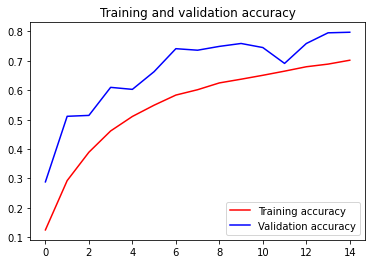

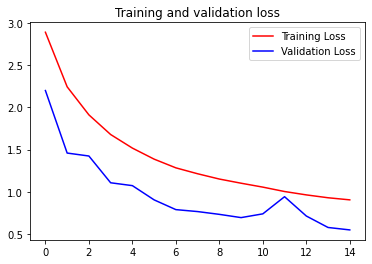

In [31]:
# Plot the chart for accuracy and loss on both training and validation

import matplotlib.pyplot as plt
acc = history.history['accuracy'] ### YOUR CODE HERE
val_acc = history.history['val_accuracy'] ### YOUR CODE HERE
loss = history.history['loss'] ### YOUR CODE HERE
val_loss = history.history['val_loss'] ### YOUR CODE HERE

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()

plt.plot(epochs, loss, 'r', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()